# SfN Delaware Chapter Talk
OPEN-SOURCE PIPELINING TO FACILITATE THE STANDARDIZATION OF DATA PRACTICES

This does require some knowledge of Python

How to create a python environment:
1) Download anaconda3 and an IDE (VScode is good)
2) Enter the following in a terminal window:
```
    conda create -n 'my_environment' python=3.9
    conda activate my_environment
    pip install matplotlib, numpy, pynwb, nwbwidgets
``````

##### See https://pynwb.readthedocs.io/en/stable/tutorials/index.html to learn how to make an NWB file in Python.

##### There is an attractive GUI that is almost production ready https://www.youtube.com/watch?v=z-rk2wi5BDc


Contact: john.j.stout.jr@gmail.com
_____

# Data sharing

1) We face a replication crisis
2) The government is mandating detailed description of data management/sharing and how to make code accessible
3) Sharing data is not always easy

### Neurodata Without Borders format
1) Highly structured with lots of metadata
2) Can upload massive file sizes to the Dandi Archive for free! (https://dandiarchive.org)
3) Once you know how to work with one file, you know how to work (almost entirely) with hundreds of files! (https://dandiarchive.org/dandiset) 
4) Can stream data on the DandiHub to take advantage of cloud computing (https://hub.dandiarchive.org/hub/login?next=%2Fhub%2F) or work with locally.
5) Supports lazy loading!!

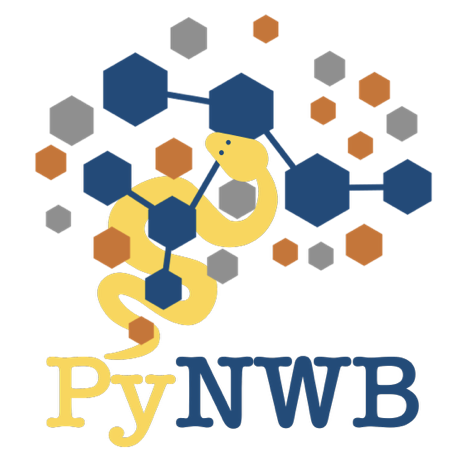

#### Reading NWB data

In [1]:
# import some pythonic packages
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO, NWBFile

# define directory with NWB data
nwbpath = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb'

# read NWB data
nwb_file = NWBHDF5IO(nwbpath, mode="r").read()

In [2]:
nwb_file

root pynwb.file.NWBFile at 0x5163551424
Fields:
  acquisition: {
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Neuralynx Cheetah <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Tetrode1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Tetrode2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Tetrode3 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Tetrode4 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Open field experiment with PFC recordings
  experimenter: ['Mohamed K.']
  file_create_date: [datetime.datetime(2023, 11, 25, 15, 49, 20, 616095, tzinfo=tzoffset(None, -18000))]
  identifier: d4de5912-b35f-444d-8dd3-26ccd7946d1c
  institution: Nemours
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Hernan and Scott labs
  notes: Great session
  session_description: Open field and PFC recordings
  session_id: Session 1
  session_start_time: 2023-11-25 15:49:20.614921-05:00
  subject: subject pynwb.file.Subject at 0x5163551520
Fields:
  age: PD90
  age__reference: birth
  description: Great mouse
  sex: Male
  species: mus musculus
  subject_id: Mouse1

  timestamps_reference_time: 2023-11-25 15:49:20.614921-05:00
  units: units <class 'pynwb.misc.Units'>

In [3]:
from nwbwidgets import nwb2widget
nwb2widget(nwb_file)

# Using Pynapple for analysis

Pynapple is an open-source toolbox that supports a variety of data analysis approaches for physiologists

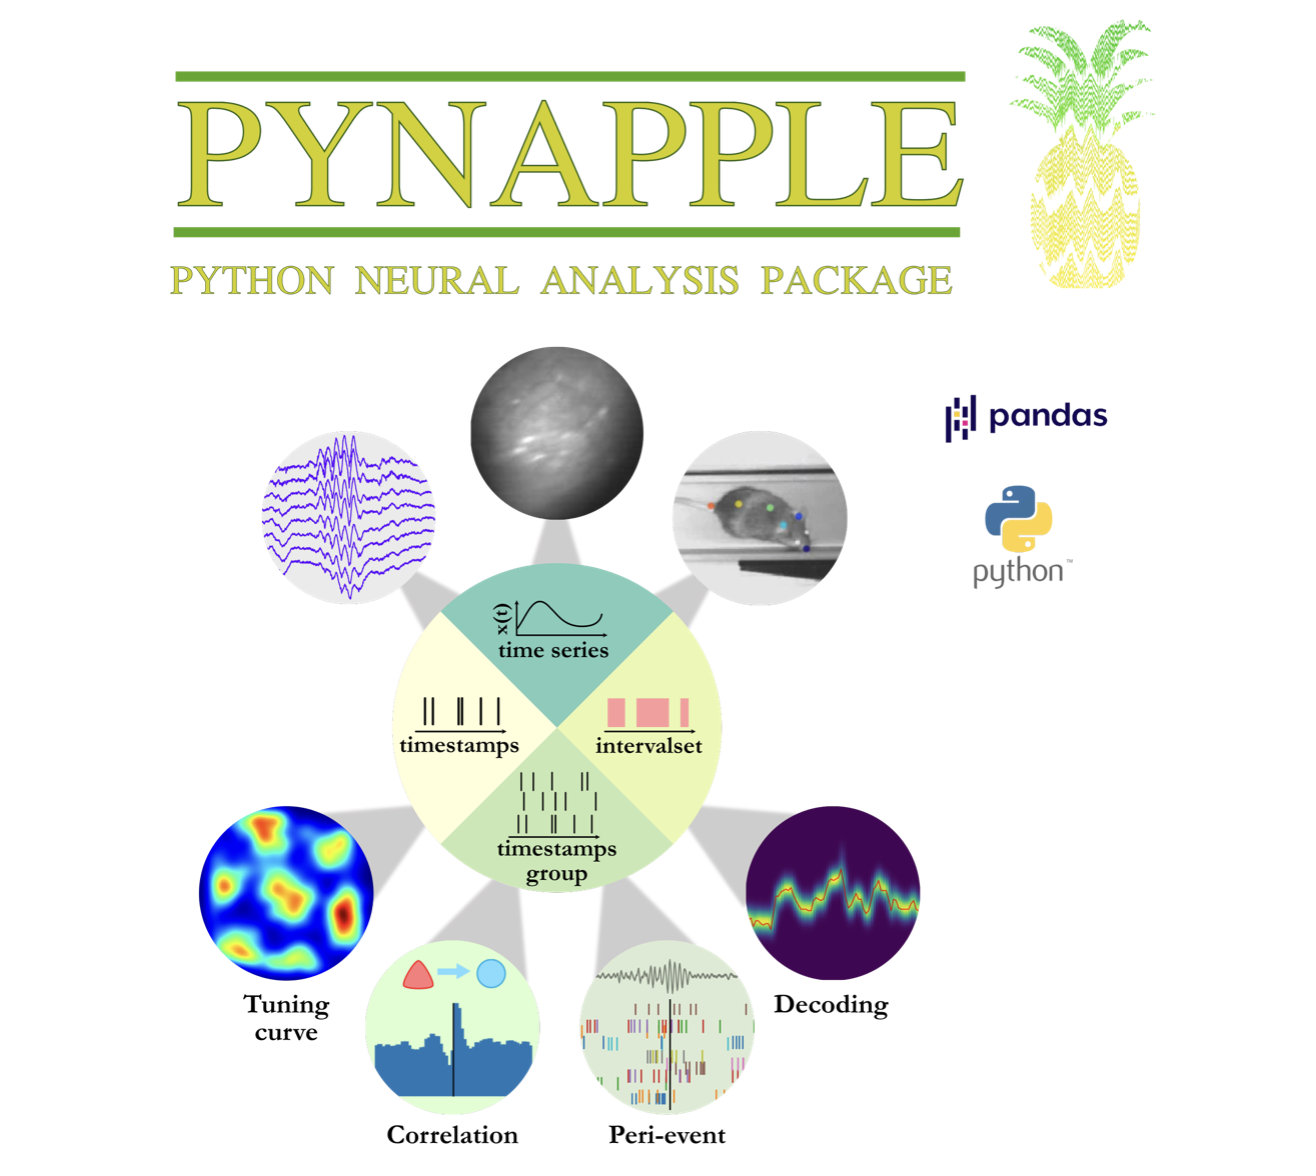

Text(0.5, 0, 'Time (s) around firing on Neuron 7')

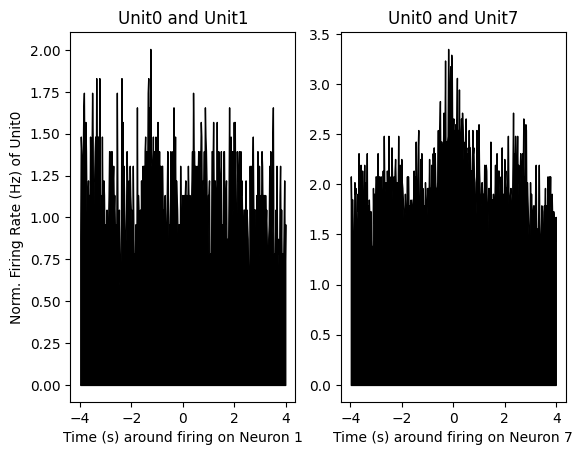

In [4]:
import pynapple as nap
data = nap.load_file(nwbpath)
spikes = data["units"]

cc_wake = nap.compute_crosscorrelogram(
    group=spikes,
    binsize=20,  # ms
    windowsize=4000,  # ms,
    norm=True,
    time_units="ms",
)

xtwake = cc_wake.index.values
plt.subplot(121)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][1].values, color="k"
)
plt.title("Unit0 and Unit1")
plt.ylabel("Norm. Firing Rate (Hz) of Unit0")
plt.xlabel("Time (s) around firing on Neuron 1")
plt.subplot(122)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][7].values, color="k"
)
plt.title('Unit0 and Unit7')
plt.xlabel("Time (s) around firing on Neuron 7")

# Coherence between channels 

### This module interfaces pynwb, Pynapple, and SciPy

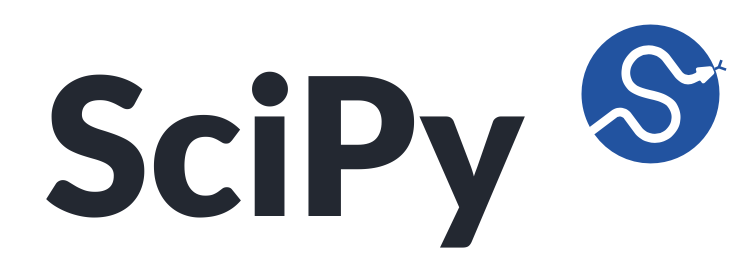

#### Using Pynapple to load data, then scipy to perform coherency

In [10]:
from scipy.signal import coherence
data['ElectricalSeries']

Time (s)            CSC1        CSC2      CSC3       CSC4        CSC5  ...
-------------  ---------  ----------  --------  ---------  ----------  -----
8145.353771    -22.7973   -26.4595    -18.5247  -25.8492     8.72829   ...
8145.35380225  -25.5135   -28.2296    -16.1138  -26.2764    24.2012    ...
8145.3538335   -17.3345   -29.4198    -17.7007  -27.1004    20.1117    ...
8145.35386475   -6.89718  -29.2367    -20.3558  -27.7718     1.67852   ...
8145.353896     -9.49126  -29.7861    -23.896   -27.8939   -12.3905    ...
...
9466.121646     -2.07526   -0.854518  -25.7271    8.39259   -2.65511   ...
9466.12167725   -1.06815   -5.34074   -26.1238    7.32444   -3.41807   ...
9466.1217085     1.03763   -9.61333   -22.3701    6.95822   -3.17393   ...
9466.12173975    2.28889  -15.8696    -15.5034    9.36918   -0.824     ...
9466.121771     -6.13422  -32.0139    -20.7526    6.04267    0.701926  ...
dtype: float64, shape: (40848770, 16)

#### Lazy loading in action!

In [13]:
# an example of lazy loading! Notice that despite this dataset
x = data['ElectricalSeries']['CSC1'][0:32000]
y = data['ElectricalSeries']['CSC10'][0:32000]

In [84]:
from scipy.signal import decimate as downsample
# downsample the data to work with lower frequency
x_down = downsample(x=x,q=16)
y_down = downsample(x=y,q=16)

Text(0.5, 0, 'Frequency (hz)')

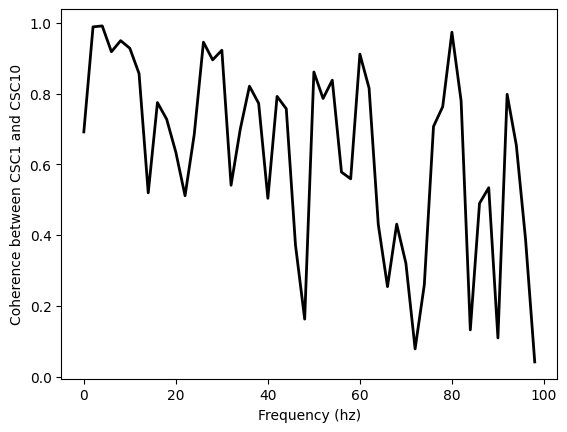

In [101]:
# Coherence analysis
fs = 32000.0/16
f, cxy = coherence(x_down,y_down,fs,nperseg=1000)
idx = np.logical_and(f>-1,f<100)
plt.plot(f[idx],cxy[idx],linewidth=2,color='k')
plt.ylabel('Coherence between CSC1 and CSC10')
plt.xlabel('Frequency (hz)')

# Idealized workflow


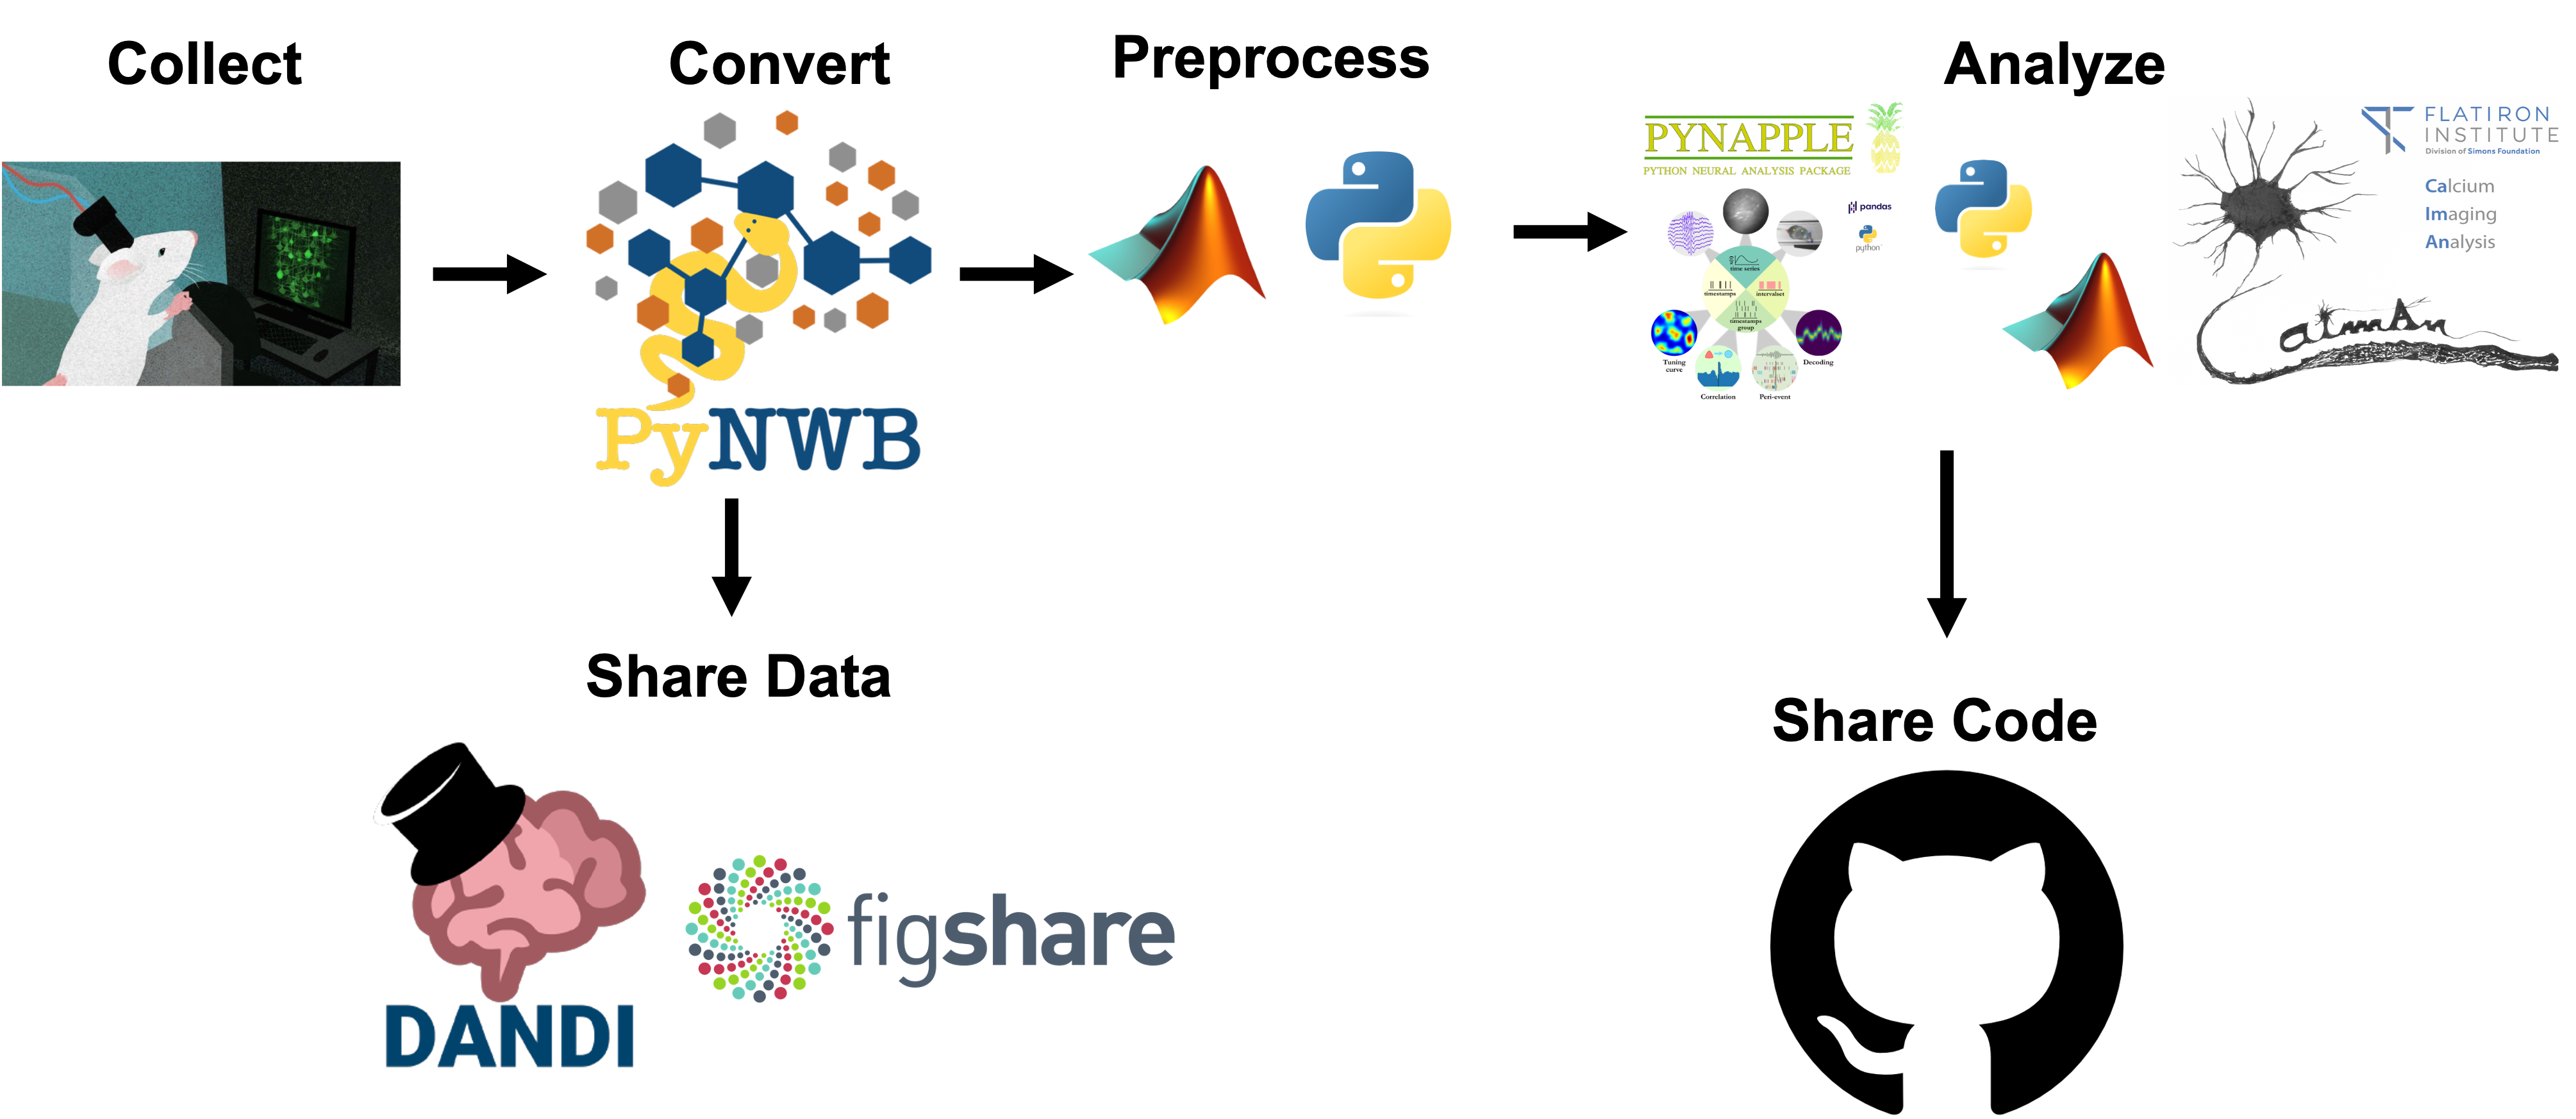


# A framework to structure the storage, analysis and sharing of neural data

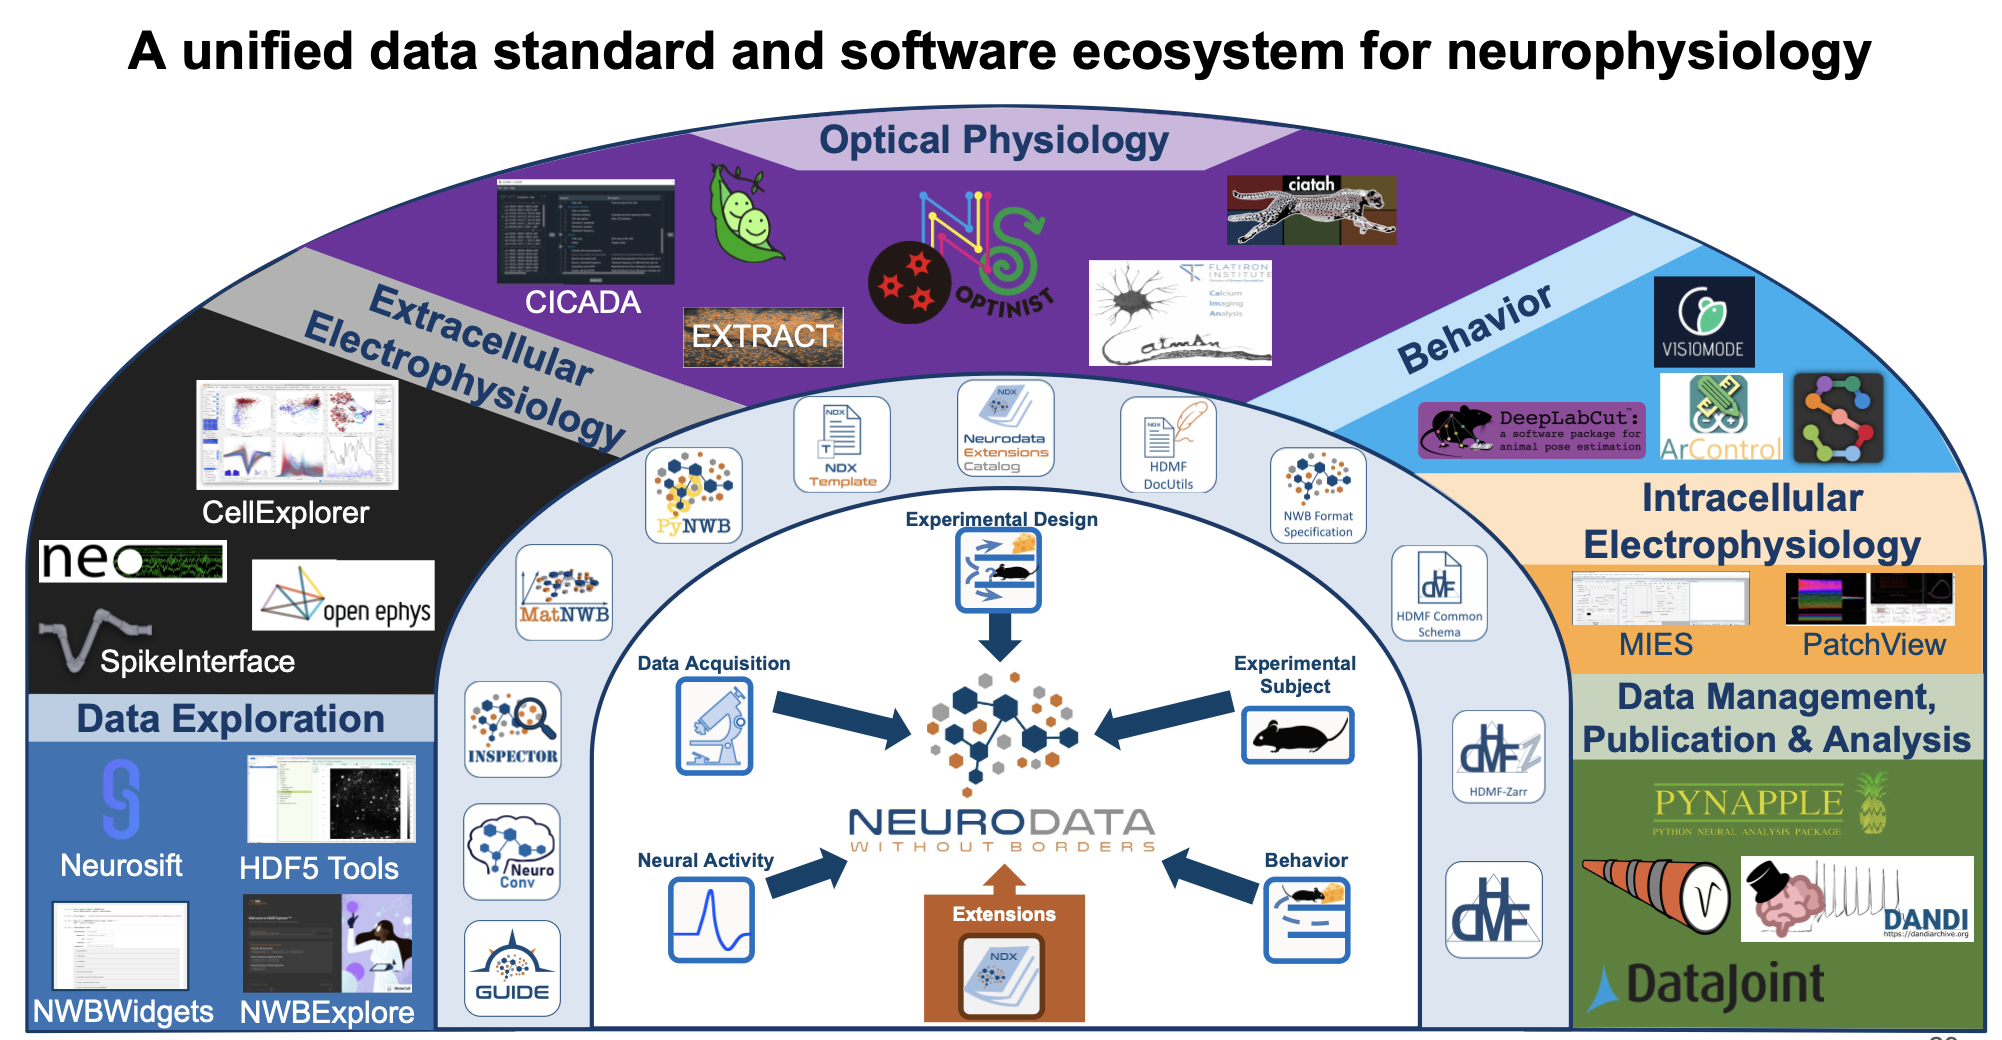